In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
pd.set_option('display.max_rows', 500)
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()
#schema['Column']
#schema.columns


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
#Checking columns with object type
df.select_dtypes(include=['object'])

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree
1,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19097,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Bachelor's degree,A business discipline,A few days each month,10 to 19 employees,"Privately-held limited company, not in startup...",...,Agree,Agree,Disagree,Male,"Some college/university study, no bachelor's d...",White or of European descent,Somewhat agree,Agree,Disagree,Agree
19098,Student,"Yes, I program as a hobby",India,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19099,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United Kingdom,No,"Independent contractor, freelancer, or self-em...",Bachelor's degree,Computer science or software engineering,Never,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19100,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Some college/university study without earning ...,A humanities discipline,"Less than half the time, but at least one day ...",100 to 499 employees,"Sole proprietorship or partnership, not in sta...",...,Agree,Disagree,Disagree,Male,"Some college/university study, no bachelor's d...",White or of European descent,Somewhat agree,Somewhat agree,Disagree,Agree


In [281]:
#Checking columns with numeric type
df.select_dtypes(include=['float','int'])

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,1,NaN,NaN,0.0,9.0,NaN,NaN
1,2,NaN,NaN,NaN,8.0,NaN,37500.0
2,3,8.0,9.0,NaN,8.0,113750.0,NaN
3,4,6.0,3.0,5.0,10.0,NaN,NaN
4,5,6.0,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19097,19098,9.0,8.0,NaN,8.0,NaN,NaN
19098,19099,NaN,NaN,NaN,NaN,NaN,NaN
19099,19100,4.0,5.0,NaN,NaN,NaN,NaN
19100,19101,8.0,9.0,NaN,9.0,110000.0,NaN


In [301]:
#Checking the content of column value
list(schema[schema['Column']=='Professional']['Question'])[0]
list(schema[schema['Column']=='FormalEducation']['Question'])[0]
list(schema[schema['Column']=='ExpectedSalary']['Question'])[0]
list(schema[schema['Column']=='ImportantHiringEducation']['Question'])[0]



"Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Communication skills"

In [302]:
list(schema[schema['Column']=='ImportantHiringCommunication']['Question'])[0]

"Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Communication skills"

In [303]:
list(schema[schema['Column']=='ImportantHiringTechExp']['Question'])[0]

"Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Experience with specific tools (libraries, frameworks, etc.) used by the employer"

In [283]:
#Basic Checkings of values
df['Professional'].value_counts()
df['FormalEducation'].value_counts()
df['ExpectedSalary'].value_counts()
df['StackOverflowSatisfaction'].value_counts()

8.0     3916
9.0     3459
10.0    3139
7.0     1858
6.0      588
5.0      301
4.0       71
3.0       58
2.0       34
1.0       16
0.0       12
Name: StackOverflowSatisfaction, dtype: int64

In [284]:
#Question1: Study the trend in expected salary reported by people with different formal education, professioanl and 
#company size 
#Ques 1, part 1
#This section provides information on Expected Salary based on formal education
df.groupby(['FormalEducation']).mean()['ExpectedSalary'].sort_values().dropna()


FormalEducation
Professional degree                                                  15259.524758
Master's degree                                                      27240.384932
Bachelor's degree                                                    27459.337572
I prefer not to answer                                               28040.986624
Secondary school                                                     33031.294772
Some college/university study without earning a bachelor's degree    35941.941020
Primary/elementary school                                            37274.890612
I never completed any formal education                               67394.043949
Name: ExpectedSalary, dtype: float64

In [285]:
#Question 1, part 2
#This section provides information on Expected Salary based on Professional
df.groupby(['Professional']).mean()['ExpectedSalary'].sort_values()


Professional
Student                                                 32231.521687
None of these                                                    NaN
Professional developer                                           NaN
Professional non-developer who sometimes writes code             NaN
Used to be a professional developer                              NaN
Name: ExpectedSalary, dtype: float64

In [286]:
# Question 1, part 3
#This section provides information on Expected Salary based on formal education
df_cs=df.groupby(['CompanySize']).mean()['ExpectedSalary'].sort_values()
df_cs

CompanySize
Fewer than 10 employees     27962.243000
1,000 to 4,999 employees    31044.830927
500 to 999 employees        32409.073400
20 to 99 employees          32718.399806
10 to 19 employees          34708.875564
10,000 or more employees    36101.308322
100 to 499 employees        40322.927562
5,000 to 9,999 employees    46739.165852
I don't know                52742.495612
I prefer not to answer      58009.008838
Name: ExpectedSalary, dtype: float64

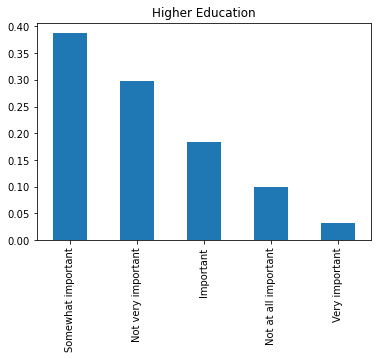

In [287]:
#Question 2: What people consider important for hiring?
#Checked 3 Categorical variables (Higher Education, Tech Experience, Communication) form bar diagram
#Ques 2, part 1
ImpHiring=['ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication',
           'ImportantHiringOpenSource','ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles',
           'ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone']
list(schema[schema['Column']=='ImportantHiringPMExp']['Question'])[0]
df_ImpHiringClean=df[ImpHiring].dropna()
df_ImpHireHE=df_ImpHiringClean['ImportantHiringEducation']
(df_ImpHireHE.value_counts()/df_ImpHireHE.shape[0]).plot(kind="bar");
plt.title("Higher Education");

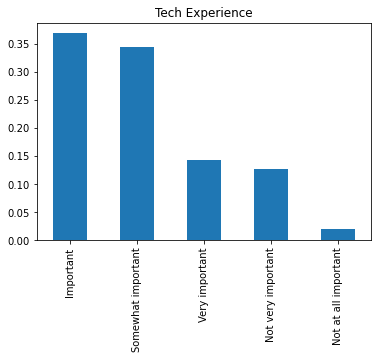

In [288]:
#Ques2, Part 2
df_ImpHireTExp=df_ImpHiringClean['ImportantHiringTechExp']
(df_ImpHireTExp.value_counts()/df_ImpHireTExp.shape[0]).plot(kind="bar");
plt.title("Tech Experience");

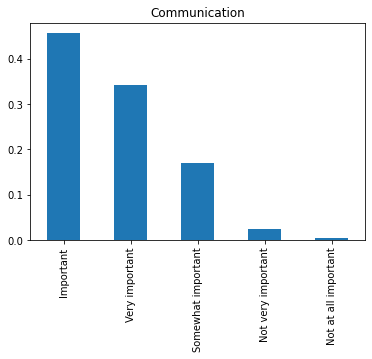

In [289]:
#Ques 2, part 3
df_ImpHireCom=df_ImpHiringClean['ImportantHiringCommunication']
(df_ImpHireCom.value_counts()/df_ImpHireCom.shape[0]).plot(kind="bar");
plt.title("Communication");

In [290]:
#Combining 3 in 1 plot
df2=df[['ImportantHiringEducation','ImportantHiringTechExp','ImportantHiringCommunication']]
df3=df2.apply(lambda x: x.value_counts()/x.shape[0])
df3=df3.rename(columns={"ImportantHiringEducation": "Education", "ImportantHiringTechExp": "TechExp", 
                    "ImportantHiringCommunication": "Communication"}, errors="raise")
df3

,Education,TechExp,Communication
Important,0.104963,0.210973,0.261282
Not at all important,0.056591,0.010575,0.002932
Not very important,0.170244,0.072296,0.014815
Somewhat important,0.220082,0.194639,0.096744
Very important,0.017852,0.081824,0.193749


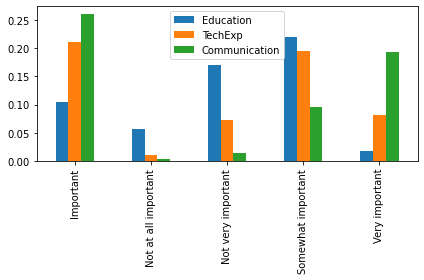

In [291]:
df3.plot.bar()
plt.tight_layout()
plt.savefig('ImportantHiring.png')

In [292]:
#Question 3: Finding Correlation among three numerical variables 
#and predict the missing salary based on linear regression model
# Ques 3, part 1
#Date frame with 3 numerical values
df_sub=num_df[['Salary','HoursPerWeek','JobSatisfaction']]
drop_df=df_sub.dropna()
#Imputing the sub data set with mean
fill_mean = lambda col: col.fillna(col.mean())
fill_df = df_sub.apply(fill_mean, axis=0)
#fill_df

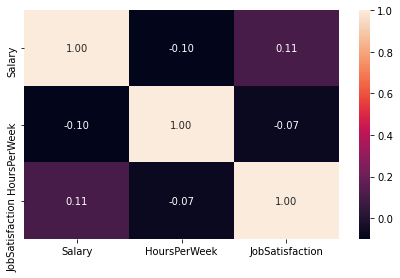

In [304]:
#heatmap to see the correlation
sns.heatmap(df_sub.corr(), annot=True, fmt=".2f");
plt.tight_layout()
plt.savefig('heatmap.png')

'The r-squared score for your model was 0.014231174476313724 on 684 values.'

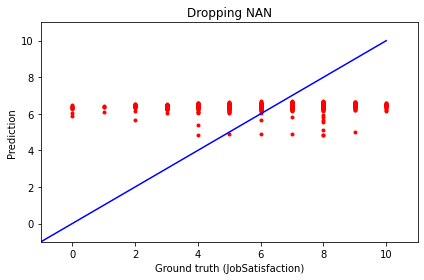

In [296]:
# Ques 2, part 2
# Building linear regression model based 1) after dropping NA's and 2) imputing with mean
# Linear Regression model prediction after dropping
#Split into explanatory and response variables
X=drop_df[['Salary','HoursPerWeek']]
y=drop_df[['JobSatisfaction']]
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
xx=np.arange(-1,11,1)
yy=np.arange(-1,11,1)
plt.plot(y_test,y_test_preds,'r.')
plt.plot(xx,yy,'b-')
plt.xlim([-1,11])
plt.ylim([-1,11])
plt.xlabel('Ground truth (JobSatisfaction)')
plt.ylabel('Prediction')
plt.title('Dropping NAN')
plt.tight_layout()
#plt.show()
plt.savefig('model_pred_NoNan.png')
"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.006048202659456936 on 5731 values.'

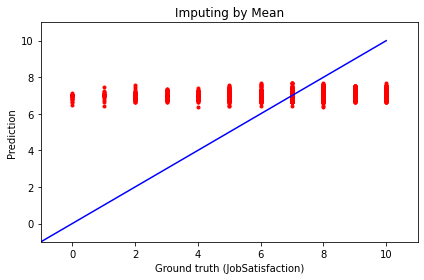

In [297]:
# Linear Regression model prediction after imputing
#Split into explanatory and response variables
X=fill_df[['Salary','HoursPerWeek']]
y=fill_df[['JobSatisfaction']]
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
xx=np.arange(-1,11,1)
yy=np.arange(-1,11,1)
plt.plot(y_test,y_test_preds,'r.')
plt.plot(xx,yy,'b-')
plt.xlim([-1,11])
plt.ylim([-1,11])
plt.xlabel('Ground truth (JobSatisfaction)')
plt.ylabel('Prediction')
plt.title('Imputing by Mean')
plt.tight_layout()
#plt.show()
plt.savefig('model_pred_ImputingMean')

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)